In [15]:
import random
import numpy as np

def minimax(state, depth, player):
    if depth == 0 or state == 0:
        return state

    if player == 2:
        best_value = -float('inf') #float('inf') instead of float(0.0000001) as its cleaner and less typo prone when copying across different parts of the code
        for move in range(1, 4):
            if state - move >= 1:
                value = minimax(state - move, depth - 1, 1)
                best_value = max(best_value, value)
        return best_value

    if player == 1:
        best_value = float('inf')
        for move in range(1, 4):
            if state - move >= 1:
                value = minimax(state - move, depth - 1, 2)
                best_value = min(best_value, value)
        return best_value

def minimaxMove(state):
    if state > 11:
        return 3
    
    best_score = -float('inf') #float('inf') instead of float(0.0000001) as its cleaner and less typo prone when copying across different parts of the code
    best_move = None
    for move in range(1, 4):
        if state - move >= 1:
            score = minimax(state - move, 3, 1)
            if score > best_score:
                best_score = score
                best_move = move
    return best_move


def rulebasedMove(state):
    if state == 2:
        return 1
    
    if state == 3:
        return 2

    if state == 4:
        return 3

    if state == 5:
        return 1
    
    if state == 6:
        return 1
    
    if state == 7:
        return 2

    if state >= 8 and state <= 11:
        return 1
    
    return 3

def main(startBoardCoins, simulation, playerSeed):
    boardCoins = startBoardCoins
    current_player = 1
    playerWon = 0
    turnCount = 0

    random.seed(playerSeed)
    
    if simulation == False:
        print("Spoof Game Starting")
        print("Starting state:", boardCoins)

    while boardCoins > 1:
        turnCount = turnCount + 1

        player1Choice = random.randint(1, 3)
        if simulation == False:
            print("[Player 1] Chose:", player1Choice)
        if boardCoins-player1Choice <= 0:
            if simulation == False:
                print("[Player 1] LOST")
            playerWon = 2
            break
        else:
            boardCoins = boardCoins - player1Choice
            if simulation == False:
                print("Board Coins Remaining:", str(boardCoins)+"/"+str(startBoardCoins))

        if boardCoins == 1:
            if simulation == False:
                print("[Player 2] LOST")
            playerWon = 1
            break

        player2Choice = rulebasedMove(boardCoins)
        if simulation == False:
            print("[Player 2] Chose:", player2Choice)
        if boardCoins-player2Choice <= 0:
            if simulation == False:
                print("[Player 2] LOST")
            playerWon = 1
            break
        else:
            boardCoins = boardCoins - player2Choice
            if simulation == False:
                print("Board Coins Remaining:", str(boardCoins)+"/"+str(startBoardCoins))

        if boardCoins == 1:
            if simulation == False:
                print("[Player 1] LOST")
            playerWon = 2
            break
    if simulation == False:
        print("Rounds Played", turnCount)
    return playerWon, turnCount

In [21]:
#Remove any seed bias when generating the random amount of coins on the baord
playerSeeds = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

#Choose a random seed from the list (without any set seed)
random.seed(None) 
choosenSeed = random.choice(playerSeeds)

boardCoins = random.randint(10, 20)
simulation = False

playerWon, turnCount = main(boardCoins, simulation, choosenSeed)
print("Player", playerWon, "Won the game")
print(turnCount, "Turns needed to finish the game")

Spoof Game Starting
Starting state: 15
[Player 1] Chose: 2
Board Coins Remaining: 13/15
[Player 2] Chose: 3
Board Coins Remaining: 10/15
[Player 1] Chose: 1
Board Coins Remaining: 9/15
[Player 2] Chose: 1
Board Coins Remaining: 8/15
[Player 1] Chose: 2
Board Coins Remaining: 6/15
[Player 2] Chose: 1
Board Coins Remaining: 5/15
[Player 1] Chose: 1
Board Coins Remaining: 4/15
[Player 2] Chose: 3
Board Coins Remaining: 1/15
[Player 1] LOST
Rounds Played 4
Player 2 Won the game
4 Turns needed to finish the game


In [22]:
# Importing Pandas to create DataFrame
import pandas as pd
import numpy as np

#Create a dataframe with the specified columns
df = pd.DataFrame(columns=['Game', 'Player', 'Rounds'])

#Lets run 100 games 
for i in range(5000):
    i = i + 1

    boardCoins = 500
    playerSeeds = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]

    random.seed(None) 
    choosenSeed = random.choice(playerSeeds)
    playerWon, turnCount = main(boardCoins, True, choosenSeed)
    df = df.append({'Game': int(i),'Player': int(playerWon), 'Rounds': int(turnCount)}, ignore_index=True)

df['Game'] = df['Game'].astype(int)
df['Player'] = df['Player'].astype(int)
df['Rounds'] = df['Rounds'].astype(int)
#df.dtypes 

df

,Game,Player,Rounds
0,1,2,101
1,2,2,101
2,3,2,98
3,4,2,98
4,5,2,100
...,...,...,...
4995,4996,2,102
4996,4997,2,100
4997,4998,2,98
4998,4999,2,103


In [23]:
df['Player'].value_counts(normalize=True) * 100

2    100.0
Name: Player, dtype: float64

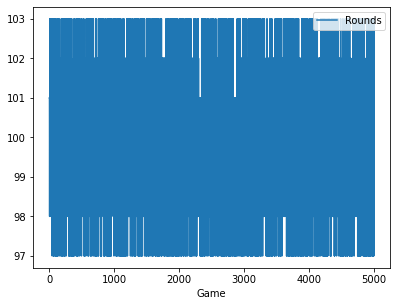

In [24]:
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (20,10)
#Reset custom plot size
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

df2 = df
df2.plot(x='Game', y='Rounds')
plt.show()

#The data is very hard to read and we could just make the graph output bigger on the X axis

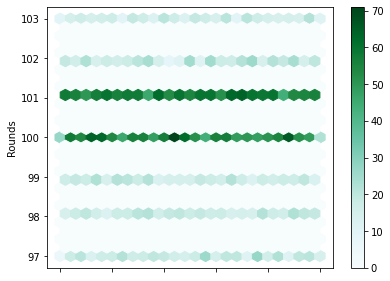

In [25]:
#Using hexbin it allows us to view the distribution of the amount of rounds played for each game
df.plot.hexbin(x="Game", y="Rounds", gridsize=25);

<AxesSubplot:>

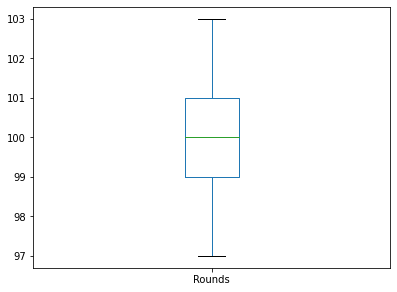

In [26]:
#We could also use box plots to view this data
dfRounds = df[["Rounds"]]
dfRounds.plot.box()

#### Visualizing the efficiency of the bot:
To see the visualize the performance of our bot we will generate a random amount of coins from 10-500 and see how many rounds it takes to solve.
If our bot is efficient we should see a "straight" positive trend line

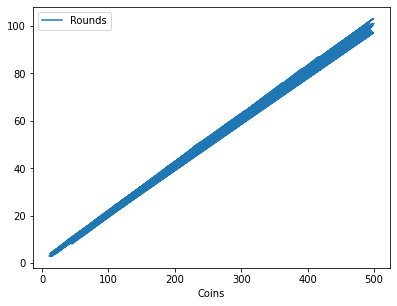

In [28]:
# Importing Pandas to create DataFrame
import pandas as pd
import numpy as np

#Create a dataframe with the specified columns
df3 = pd.DataFrame(columns=['Game', 'Player', 'Rounds', 'Coins'])

#Lets run 1000 games 
for i in range(1000):
    i = i + 1

    playerSeeds = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
    random.seed(None)
    
    boardCoins = random.randint(10, 500)
    choosenSeed = random.choice(playerSeeds)
    playerWon, turnCount = main(boardCoins, True, choosenSeed)
    df3 = df3.append({'Game': int(i),'Player': int(playerWon), 'Rounds': int(turnCount), 'Coins': boardCoins}, ignore_index=True)

df3['Game'] = df3['Game'].astype(int)
df3['Player'] = df3['Player'].astype(int)
df3['Rounds'] = df3['Rounds'].astype(int)
df3['Coins'] = df3['Coins'].astype(int)

df3.plot(x='Coins', y='Rounds')
plt.show()